In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('output.csv')

df.reset_index(inplace=True)

df.head()


,index,`charge_amount`,`currency`,`membership_id`,`description_event`,`discount`,`status`,`message`,`transaction_date`,`triggered_by`,`payment_method`
0,1123.75,NaN,2,membership payment,0,Success,Success,May 15,2019,system,PaymentCard
1,999,NaN,1,membership payment,0,Success,Success,June 7,2019,system,PaymentCard
2,3209.43,NaN,7,membership payment,0,Success,Success,July 9,2019,system,PaymentCard
3,"6,291",NaN,5,membership payment,0,Success,Success,August 9,2019,system,PaymentCard
4,"1,497",NaN,4,membership payment,0,Success,Success,September 4,2019,system,PaymentCard


In [3]:
df.columns



Index(['index', '`charge_amount`', '`currency`', '`membership_id`',
       '`description_event`', '`discount`', '`status`', '`message`',
       '`transaction_date`', '`triggered_by`', '`payment_method`'],
      dtype='object')

In [4]:
df.rename(columns={
    'index': 'charge_amount',
    '`charge_amount`': 'currency',
    '`currency`': 'membership_id',
    '`membership_id`': 'description_event',
    '`description_event`': 'discount',
    '`discount`': 'status',
    '`status`': 'message',
    '`message`': 'transaction_date',
    '`transaction_date`': 'transaction_year',
    '`triggered_by`': 'triggered_by',
    '`payment_method`': 'payment_method'
}, inplace=True)

# Print or inspect the DataFrame with the updated column names
df.head()


,charge_amount,currency,membership_id,description_event,discount,status,message,transaction_date,transaction_year,triggered_by,payment_method
0,1123.75,NaN,2,membership payment,0,Success,Success,May 15,2019,system,PaymentCard
1,999,NaN,1,membership payment,0,Success,Success,June 7,2019,system,PaymentCard
2,3209.43,NaN,7,membership payment,0,Success,Success,July 9,2019,system,PaymentCard
3,"6,291",NaN,5,membership payment,0,Success,Success,August 9,2019,system,PaymentCard
4,"1,497",NaN,4,membership payment,0,Success,Success,September 4,2019,system,PaymentCard


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2353 entries, 0 to 2352
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   charge_amount      2353 non-null   object
 1   currency           2329 non-null   object
 2   membership_id      2353 non-null   int64 
 3   description_event  2353 non-null   object
 4   discount           2353 non-null   int64 
 5   status             2353 non-null   object
 6   message            2349 non-null   object
 7   transaction_date   2353 non-null   object
 8   transaction_year   2353 non-null   int64 
 9   triggered_by       2353 non-null   object
 10  payment_method     2353 non-null   object
dtypes: int64(3), object(8)
memory usage: 202.3+ KB


In [6]:
df['charge_amount'] = pd.to_numeric(df['charge_amount'].str.replace(',', ''), errors='coerce')
df.head()

,charge_amount,currency,membership_id,description_event,discount,status,message,transaction_date,transaction_year,triggered_by,payment_method
0,1123.75,NaN,2,membership payment,0,Success,Success,May 15,2019,system,PaymentCard
1,999.00,NaN,1,membership payment,0,Success,Success,June 7,2019,system,PaymentCard
2,3209.43,NaN,7,membership payment,0,Success,Success,July 9,2019,system,PaymentCard
3,6291.00,NaN,5,membership payment,0,Success,Success,August 9,2019,system,PaymentCard
4,1497.00,NaN,4,membership payment,0,Success,Success,September 4,2019,system,PaymentCard


In [7]:
df['transaction_datetime'] = pd.to_datetime(df['transaction_date'].str.cat(df['transaction_year'].astype(str), sep=' '), errors='coerce')
df.drop(['transaction_date', 'transaction_year'], axis=1, inplace=True)
df.head()

,charge_amount,currency,membership_id,description_event,discount,status,message,triggered_by,payment_method,transaction_datetime
0,1123.75,NaN,2,membership payment,0,Success,Success,system,PaymentCard,2019-05-15
1,999.00,NaN,1,membership payment,0,Success,Success,system,PaymentCard,2019-06-07
2,3209.43,NaN,7,membership payment,0,Success,Success,system,PaymentCard,2019-07-09
3,6291.00,NaN,5,membership payment,0,Success,Success,system,PaymentCard,2019-08-09
4,1497.00,NaN,4,membership payment,0,Success,Success,system,PaymentCard,2019-09-04


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2353 entries, 0 to 2352
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   charge_amount         2353 non-null   float64       
 1   currency              2329 non-null   object        
 2   membership_id         2353 non-null   int64         
 3   description_event     2353 non-null   object        
 4   discount              2353 non-null   int64         
 5   status                2353 non-null   object        
 6   message               2349 non-null   object        
 7   triggered_by          2353 non-null   object        
 8   payment_method        2353 non-null   object        
 9   transaction_datetime  2353 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 184.0+ KB


In [9]:
print(df.isna().sum())

charge_amount            0
currency                24
membership_id            0
description_event        0
discount                 0
status                   0
message                  4
triggered_by             0
payment_method           0
transaction_datetime     0
dtype: int64


In [10]:
nan_currency_rows = df[df['currency'].isna()]

nan_currency_rows.head()

,charge_amount,currency,membership_id,description_event,discount,status,message,triggered_by,payment_method,transaction_datetime
0,1123.75,NaN,2,membership payment,0,Success,Success,system,PaymentCard,2019-05-15
1,999.00,NaN,1,membership payment,0,Success,Success,system,PaymentCard,2019-06-07
2,3209.43,NaN,7,membership payment,0,Success,Success,system,PaymentCard,2019-07-09
3,6291.00,NaN,5,membership payment,0,Success,Success,system,PaymentCard,2019-08-09
4,1497.00,NaN,4,membership payment,0,Success,Success,system,PaymentCard,2019-09-04


In [11]:
df['currency'] = df.groupby('membership_id')['currency'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
df.head()

,charge_amount,currency,membership_id,description_event,discount,status,message,triggered_by,payment_method,transaction_datetime
0,1123.75,DKK,2,membership payment,0,Success,Success,system,PaymentCard,2019-05-15
1,999.00,USD,1,membership payment,0,Success,Success,system,PaymentCard,2019-06-07
2,3209.43,USD,7,membership payment,0,Success,Success,system,PaymentCard,2019-07-09
3,6291.00,USD,5,membership payment,0,Success,Success,system,PaymentCard,2019-08-09
4,1497.00,USD,4,membership payment,0,Success,Success,system,PaymentCard,2019-09-04


In [12]:
print(df.isna().sum())

charge_amount           0
currency                1
membership_id           0
description_event       0
discount                0
status                  0
message                 4
triggered_by            0
payment_method          0
transaction_datetime    0
dtype: int64


In [13]:
# Display rows where 'currency' column has NaN values
nan_currency_rows = df[df['currency'].isna()]

# Print or inspect the rows
nan_currency_rows.head()

,charge_amount,currency,membership_id,description_event,discount,status,message,triggered_by,payment_method,transaction_datetime
9,1497.0,NaN,17,membership payment,0,Success,Success,system,PaymentCard,2019-10-22


In [14]:
charge_amount_rows = df[df['charge_amount'] == 1497.0]
charge_amount_rows.head()

,charge_amount,currency,membership_id,description_event,discount,status,message,triggered_by,payment_method,transaction_datetime
4,1497.0,USD,4,membership payment,0,Success,Success,system,PaymentCard,2019-09-04
7,1497.0,USD,8,membership payment,0,Success,Success,system,PaymentCard,2019-09-04
9,1497.0,NaN,17,membership payment,0,Success,Success,system,PaymentCard,2019-10-22
11,1497.0,USD,15,membership payment,0,Success,Success,system,PaymentCard,2019-11-19
12,1497.0,USD,20,membership payment,0,Success,Success,system,PaymentCard,2019-11-19


In [15]:
df['currency'].fillna('USD', inplace=True)
print(df.isna().sum())

charge_amount           0
currency                0
membership_id           0
description_event       0
discount                0
status                  0
message                 4
triggered_by            0
payment_method          0
transaction_datetime    0
dtype: int64


In [16]:
message_rows = df[df['message'].isna()]
message_rows.head()

,charge_amount,currency,membership_id,description_event,discount,status,message,triggered_by,payment_method,transaction_datetime
475,5394.0,USD,105,membership additional service,0,Failed,NaN,staff,PaymentCard,2021-04-15
1827,2997.0,USD,245,membership payment,0,Failed,NaN,system,PaymentCard,2022-08-05
2094,5394.0,USD,256,membership payment,0,Failed,NaN,system,PaymentCard,2022-10-05
2321,12000.0,USD,136,membership payment,0,Failed,NaN,system,PaymentCard,2022-12-19


In [17]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"\nUnique values in column '{col}':\n{unique_values}")


Unique values in column 'charge_amount':
[  1123.75    999.     3209.43   6291.     1497.     2097.     3371.25
   2247.5     499.     7125.     2997.     8997.     7440.    22320.
  12495.    22312.5  178747.5   32497.5   10788.     2375.     3236.4
   2999.     8000.     3600.     3000.     1500.    12000.    22800.
   6597.     1096.78   5394.   199980.     4000.      803.    11400.
  10800.     1798.    21000.     1001.    45000.     1300.     1200.
   2409.     1896.    12947.5     632.    58500.    31875.    46750.
    955.57   7316.25   4495.     9996.    25895.     4860.     4530.
   3290.34  21915.     3425.19  20716.    17850.   150000.    19188.
   2866.71   2045.     9000.    17100.     1620.     7007.     3263.37
  11895.24  72000.     9158.75  18750.     3750.   100000.     7437.5
  22477.5  200000.      620.    71250.    15780.     3800.    46312.5
  77685.    19380.     3596.    50000.     1000.     2002.   120000.
  10000.      500.     2000.     8990.    89990.     3

In [18]:
conversion_rates = {'DKK': 0.15, 'USD': 1.0, 'EUR': 1.09, 'GBP': 1.27}

df['charge_amount_usd'] = df.apply(lambda row: row['charge_amount'] * conversion_rates[row['currency']], axis=1)

df.head()

,charge_amount,currency,membership_id,description_event,discount,status,message,triggered_by,payment_method,transaction_datetime,charge_amount_usd
0,1123.75,DKK,2,membership payment,0,Success,Success,system,PaymentCard,2019-05-15,168.5625
1,999.00,USD,1,membership payment,0,Success,Success,system,PaymentCard,2019-06-07,999.0000
2,3209.43,USD,7,membership payment,0,Success,Success,system,PaymentCard,2019-07-09,3209.4300
3,6291.00,USD,5,membership payment,0,Success,Success,system,PaymentCard,2019-08-09,6291.0000
4,1497.00,USD,4,membership payment,0,Success,Success,system,PaymentCard,2019-09-04,1497.0000


In [19]:
total_revenue = df[df['status'] == 'Success']['charge_amount_usd'].sum()

print(f'Total Revenue from Successful Transactions: {total_revenue:.2f} USD')

Total Revenue from Successful Transactions: 6623506.93 USD


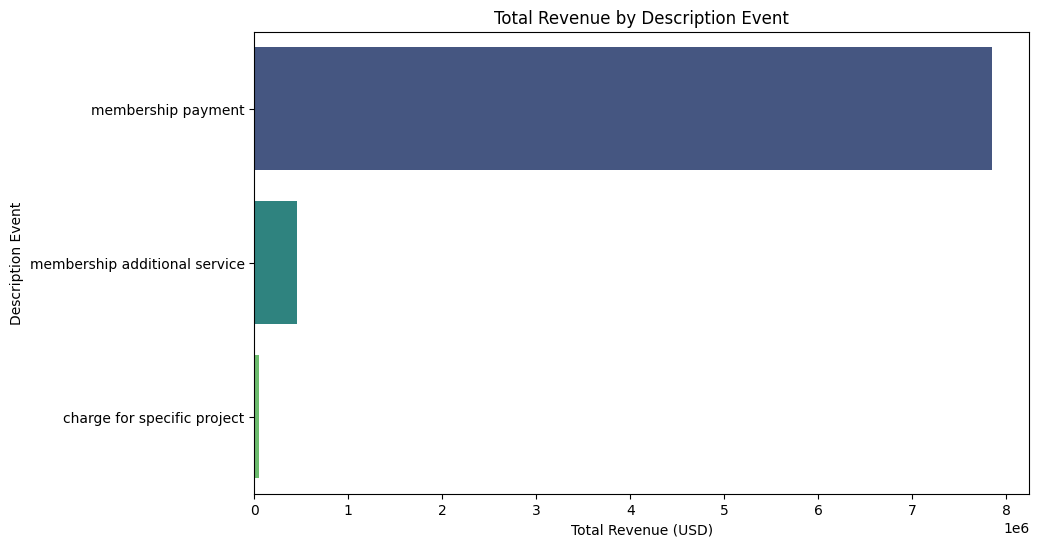

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

revenue_by_event = df.groupby('description_event')['charge_amount_usd'].sum().reset_index()

pd.set_option('display.float_format', lambda x: '%.2f' % x)

revenue_by_event_sorted = revenue_by_event.sort_values('charge_amount_usd', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='charge_amount_usd', y='description_event', data=revenue_by_event_sorted, palette='viridis')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Description Event')
plt.title('Total Revenue by Description Event')
plt.show()

In [21]:
print("Total Revenue by Description Event:")
print(revenue_by_event)

Total Revenue by Description Event:
               description_event  charge_amount_usd
0    charge for specific project           45381.19
1  membership additional service          453670.92
2             membership payment         7852129.87


Unique Membership Counts by Message:
                                             message  unique_membership_count
0                                   Invalid account.                        1
1  Your card does not support this type of purchase.                        4
2                  Your card has insufficient funds.                       13
3                     Your card number is incorrect.                        3
4                            Your card was declined.                       18
5  Your card was declined. This transaction requi...                        1


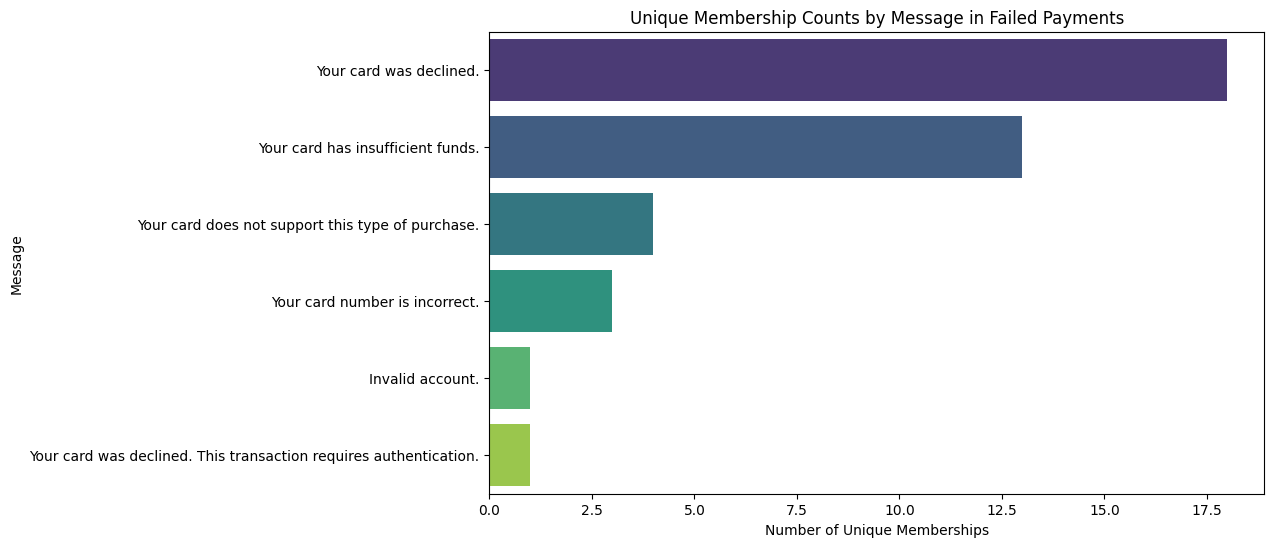

In [22]:
failed_df = df[df['status'] == 'Failed']

failed_payment_counts = failed_df.groupby('message')['membership_id'].nunique().reset_index(name='unique_membership_count')

print("Unique Membership Counts by Message:")
print(failed_payment_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x='unique_membership_count', y='message', data=failed_payment_counts.sort_values('unique_membership_count', ascending=False), palette='viridis')
plt.xlabel('Number of Unique Memberships')
plt.ylabel('Message')
plt.title('Unique Membership Counts by Message in Failed Payments')
plt.show()

Unique Datetime Counts by Message:
                                             message  unique_datetime_count
0                                   Invalid account.                     63
1  Your card does not support this type of purchase.                     71
2                  Your card has insufficient funds.                     57
3                     Your card number is incorrect.                     61
4                            Your card was declined.                    218
5  Your card was declined. This transaction requi...                     14


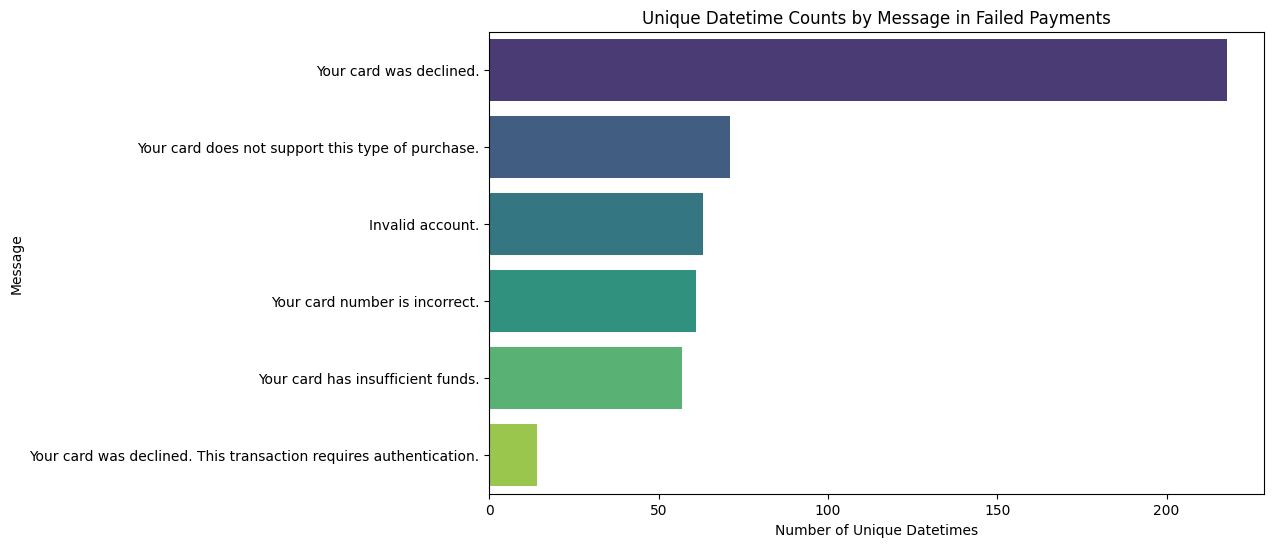

In [23]:
failed_df = df[df['status'] == 'Failed']

failed_payment_counts = failed_df.groupby('message')['transaction_datetime'].nunique().reset_index(name='unique_datetime_count')

print("Unique Datetime Counts by Message:")
print(failed_payment_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x='unique_datetime_count', y='message', data=failed_payment_counts.sort_values('unique_datetime_count', ascending=False), palette='viridis')
plt.xlabel('Number of Unique Datetimes')
plt.ylabel('Message')
plt.title('Unique Datetime Counts by Message in Failed Payments')
plt.show()

In [24]:
df.head()

,charge_amount,currency,membership_id,description_event,discount,status,message,triggered_by,payment_method,transaction_datetime,charge_amount_usd
0,1123.75,DKK,2,membership payment,0,Success,Success,system,PaymentCard,2019-05-15,168.56
1,999.00,USD,1,membership payment,0,Success,Success,system,PaymentCard,2019-06-07,999.00
2,3209.43,USD,7,membership payment,0,Success,Success,system,PaymentCard,2019-07-09,3209.43
3,6291.00,USD,5,membership payment,0,Success,Success,system,PaymentCard,2019-08-09,6291.00
4,1497.00,USD,4,membership payment,0,Success,Success,system,PaymentCard,2019-09-04,1497.00


In [25]:
df.to_csv(r'membership_transactions.csv', index=False)